In [29]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(size=20, verbose=False):
    X = np.random.uniform(size=(size, 2))
    y = np.array(X[:, 0] > X[:, 1], dtype=float)*2-1

    if verbose==True:
        print(X)
        print(y)

    return X, y

In [30]:
def plot_dataset(X, y):
    for k in set(y):
        plt.plot(X[:, 0][y == k], X[:, 1][y == k], "o", alpha=0.3)


def plot_vetor(vetor, color="k"):
    origem = [0, 0]
    plt.arrow(*origem, *vetor, color=color)
    plt.show()


def perpendicular(hiperplano):
    perp = np.array(hiperplano[::-1])
    perp[0] *= -1

    return perp

In [31]:
def step_func(y):
    return (y >= 0)*2 - 1


def accuracy(y, y_pred, verbose=False):
    accuracy = sum(y_pred == y) / len(y)
    if verbose == True:
        print(f"Accuracy={accuracy}")

    return accuracy

In [32]:
class CostPerceptron():
    @staticmethod
    def error(y, y_pred):
        return y - y_pred
    @staticmethod
    def cost(y, y_pred):
        return np.sum(CostPerceptron.error(y, y_pred)**2)
    @staticmethod
    def gradient(y, y_pred, X):
        return np.matmul(CostPerceptron.error(y, y_pred), X)

class HingeLoss():
    @staticmethod
    def error(y, y_pred):
        return np.multiply(y, y_pred)
    @staticmethod
    def cost(y, y_pred):
        return np.sum(1 - HingeLoss.error(y, y_pred))
    @staticmethod
    def gradient(y, y_pred, X):
        marginals = HingeLoss.error(y, y_pred) < 1
        return np.matmul(y[marginals], X[marginals])

class Adaline():
    def __init__(self):
        self.pre_activated = True

    @staticmethod
    def error(y, y_pred):
        return y - y_pred
    @staticmethod
    def cost(y, y_pred):
        return np.sum((1 - Adaline.error(y, y_pred))**2)
    @staticmethod
    def gradient(y, y_pred, X):
        return np.matmul(Adaline.error(y, y_pred), X)

In [33]:
class Perceptron(object):

    def __init__(self, activation=step_func, cf=CostPerceptron()):
        self.weights = None        
        self.activation = step_func
        self.cf = cf

    def fit(self, X, y, lr=1e-1, epochs=5, verbose=False):
        # inicializando com valores aleatórios entre -1 e 1
        self.weights = np.random.uniform(1, -1, size=2)        
        
        for epoch in range(1, epochs + 1):
            if hasattr(self.cf, 'pre_activated') and self.cf.pre_activated:
                y_pred = self.pre_activate(X)
            else:
                y_pred = self.predict(X)
            loss = self.cf.error(y, y_pred)
            cost = self.cf.cost(y, y_pred)

            self.weights = self.weights + lr * self.cf.gradient(y, y_pred, X)

            if verbose == True:
                if epoch == 1:
                    print()
                print(f"epoch={epoch} - cost={cost}")

            if cost == 0.0:
                break

    def pre_activate(self, X):
        return np.matmul(X, self.weights)

    def predict(self, X):
        output = self.pre_activate(X)
        y_pred = self.activation(output)
        return y_pred

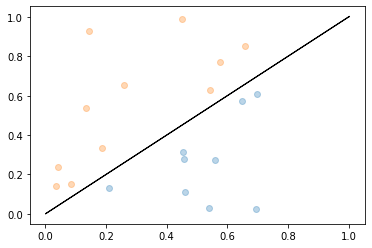


epoch=1 - cost=44.0
epoch=2 - cost=36.0
epoch=3 - cost=44.0
epoch=4 - cost=28.0
epoch=5 - cost=8.0
epoch=6 - cost=8.0
epoch=7 - cost=4.0
epoch=8 - cost=0.0
Accuracy=0.98


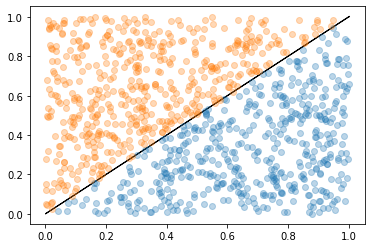


epoch=1 - cost=10.0
epoch=2 - cost=4.0
epoch=3 - cost=4.0
epoch=4 - cost=4.0
epoch=5 - cost=2.0
epoch=6 - cost=0.0
Accuracy=0.97


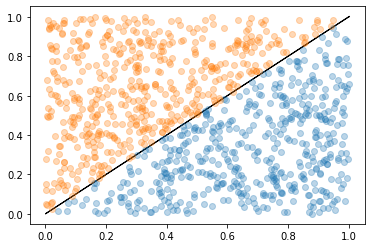


epoch=1 - cost=35.75270364818678
epoch=2 - cost=34.87747274129134
epoch=3 - cost=33.58331094624294
epoch=4 - cost=32.49485772892353
epoch=5 - cost=31.65190074168741
epoch=6 - cost=31.012823787295872
epoch=7 - cost=30.533600313246108
epoch=8 - cost=30.178022683048116
epoch=9 - cost=29.91754802194171
epoch=10 - cost=29.729887825217563
epoch=11 - cost=29.597695849466596
epoch=12 - cost=29.507504246725507
epoch=13 - cost=29.44888207676106
epoch=14 - cost=29.41377318841978
epoch=15 - cost=29.395976012718165
epoch=16 - cost=29.390735182874973
epoch=17 - cost=29.394421181188672
epoch=18 - cost=29.404279242975164
epoch=19 - cost=29.418232726303145
epoch=20 - cost=29.434729295279976
Accuracy=0.982


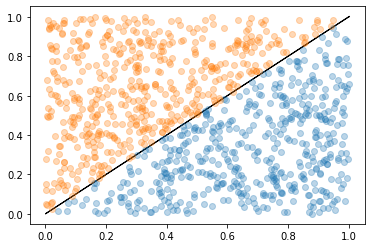

In [34]:
X, y = generate_dataset()

plot_dataset(X, y)
hiperplano = [1, -1]
vetor = perpendicular(hiperplano)
plot_vetor(vetor)

cfs_str = ["perceptron_criterion", "hinge_loss", "adaline"]
cfs = [CostPerceptron(), HingeLoss(), Adaline()]
accs = [0.0, 0.0, 0.0]
X_test, y_test = generate_dataset(1000)

for cf in cfs:

    perceptron = Perceptron(cf=cf)

    perceptron.fit(X, y, epochs=20, verbose=True)
    y_pred = perceptron.predict(X_test)
    accuracy(y_test, y_pred, verbose=True)
    
    plot_dataset(X_test, y_test)
    plot_vetor(perpendicular(hiperplano))


In [54]:
accs = [[], [], []]

for i in range(20):
    for idx, cf in enumerate(cfs):
        perceptron = Perceptron(cf=cf)

        perceptron.fit(X, y, epochs=20)
        y_pred = perceptron.predict(X_test)
        accs[idx].append(accuracy(y_test, y_pred))

print([f"{c}={np.mean(x)}, dev={np.std(x)}"  for x, c in zip(accs, cfs_str)])

['perceptron_criterion=0.98105, dev=0.017619520424801593', 'hinge_loss=0.9890999999999999, dev=0.010261091559868287', 'adaline=0.98275, dev=0.0022776083947860766']


1. Em qual caso você obteve a melhor acurácia, e por quê?

Em geral a melhor acurácia, será obtida pelo método de custo, hinge loss. Pois ele possui uma descida gradiente mais suave para encontrar o mínimo global. O algoritmo hinge loss também é mais eficaz, chegando ao mínimo global mais rapidamente. No entanto, a depender do dataset gerado, o algoritmo Criterion Perceptron, pode ser melhor.

2. Em qual caso você acha que a classificação dos mesmos 1000 pontos de teste não será significativamente diferente se o algoritmo for treinado com 20 pontos diferentes, também gerados aleatoriamente?

O método Criterion Perceptron, terá uma probabilidade maior de ter resultados melhores. Eu cheguei a 